<center><b><h1>Data Mining Term Project Spring 2020</h1></bold></center>

>Name: Patel, Meetkumar Jigneshbhai<br>
>UTA ID: 100175000

The goal of the term project is building a classifier that you can show to someone with your homepage that will help you look competent.<br><br>



<h2>Overview of this notebook:</h2>

1.   I have used Board game geek dataset from kaggle:<br>
     Link: https://www.kaggle.com/jvanelteren/boardgamegeek-reviews<br>

2.   This dataset has 13million rows which is quite large dataset for the system that we use, so I have implemented this project on google colaboratory.<br>

3.    Data preprocessing on dataset:<br>
    In preprocessing, I removed all the rows having no values in comment column, as without comment value there is nothing to predict. 
    To remove stop words from comments, first, I tokenized those comments using tokenizer tool provided by Natural Language toolkit (NLTK), and then removed those stop words. In nltk, there is one class "corpus" which contains list of these stop words. Along with them, comments are also converted into lower alphabets using lower() function.<br>
    Data visualization:
    For data visualization, I have used matplotlib library and plotted graph for total number of comments with their ratings value, and mean and median values.

4.   Models for data training and testing:<br>
    There are so many models for text classification, Naive Bayes, Support vector machine, random forest, ridge regression, linear regression, etc.<br>
    I have used some of those models in order to get the best accuracy on the dataset I am using.<br>

5.   Performance evaluation of algorithms:<br>
    We must know how our algorithm is working. For that purpose, some accuracy measures, error meaasurement techniques are used. <br>
    Such as, confusion matrix, F1 score, precision, recall, etc.



<h2>Classifiers in this project:</h2>


>1. Multinomial Naive Bayes

This is basic logic behind naive bayes. It is all about conditional dependency.The term Multinomial Naive Bayes simply lets us know that each p(fi|c) is a multinomial distribution, rather than some other distribution. This works well for data which can easily be turned into counts, such as word counts in text.<br> 
![alt text](https://miro.medium.com/max/341/0*EfYTXtTJ9X-Ua9Nh.png)

>2. Ridge Classifier

This classifier first converts the target values into {-1, 1} and then treats the problem as a regression task (multi-output regression in the multiclass case). The L2 norm term in ridge regression is weighted by the regularization parameter alpha. So, if the alpha value is 0, it means that it is just an Ordinary Least Squares Regression model. So, the larger is the alpha, the higher is the smoothness constraint.
<br>
![alt text](https://miro.medium.com/max/1528/1*3cEysrHZokqla0tXnZ-5GQ.png)
<br><br>
<bold>Example:
<br>
![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Bayes_41-850x310.png)
<br>
P(Yes | Sunny) = P( Sunny | Yes) * P(Yes) / P (Sunny)<br>
Here we have P (Sunny |Yes) = 3/9 = 0.33, P(Sunny) = 5/14 = 0.36, P( Yes)= 9/14 = 0.64<br>
Now, P (Yes | Sunny) = 0.33 * 0.64 / 0.36 = 0.60, which has higher probability.

>3. Support vector machine<br>

SVM is a supervised machine learning algorithm which can be used for classification or regression problems.Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. SVM has one argument named "kernel", which specifies, the hyperplane shape which separates labels. I am using Linear shape for kernel value.<br>
![alt text](https://66.media.tumblr.com/ff709fe1c77091952fb3e3e6af91e302/tumblr_inline_o9aa8dYRkB1u37g00_540.png)

>4. k nearest neighbours<br>

kNN is easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.
<br>
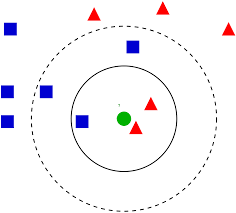

>5. Logistic regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Logistic regression is a statistical model that in its basic form uses a logistic function. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.<br><br>
Below image shows difference between linear and logistic regression.
<br>
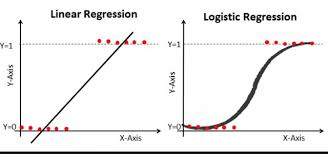

>Ensemble methods<br>

Ensemple method is machine learning trechnique which improves accuracy of algorithm by combining two or more individual algorithms for same dataset.<br>
On above part, I got accuracy for SVC, Linear SVC, logistic regression, but that is very low to classify some random text.<br>
SO here, I am using ensemble method on those algorithms to get better accuracy than what I have got.<br><br>
Below is the architecture of working of ensemble methods.<br>
![alt text](https://miro.medium.com/max/1400/0*PBGJw23ud8Sp7qO4.)

Importing required dependencies and mounting google drive for data fetching
---

In [2]:
import os
import sys
import re
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction, linear_model, model_selection,preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,classification_report
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression,Ridge,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import accuracy_score
import time
from time import sleep
#nltk toolkit used for stopwords removing
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('punkt')
nltk.download("stopwords")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Mounting google drive to read dataset

In [3]:
#code to mount google drive for data 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
os.chdir('/content/gdrive/My Drive/Data mining/')

Data acquisition of Board Game Geek dataset from google drive
---

In [5]:
#data acquisition from the given path in google drive
review_data_game = pd.read_csv("bgg-13m-reviews.csv")
print("Length of review data: ",len(review_data_game))
#representing first five rows from dataframe
review_data_game.head()

Length of review data:  13170073


,Unnamed: 0,user,rating,comment,ID,name
0,0,sidehacker,10.0,NaN,13,Catan
1,1,Varthlokkur,10.0,NaN,13,Catan
2,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan
3,3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan
4,4,ssmooth,10.0,NaN,13,Catan


Pre-processing of the dataset
---

In [6]:
# counting total NaN values in each column
review_data_game.isna().sum()

Unnamed: 0           0
user                66
rating               0
comment       10532317
ID                   0
name                 0
dtype: int64

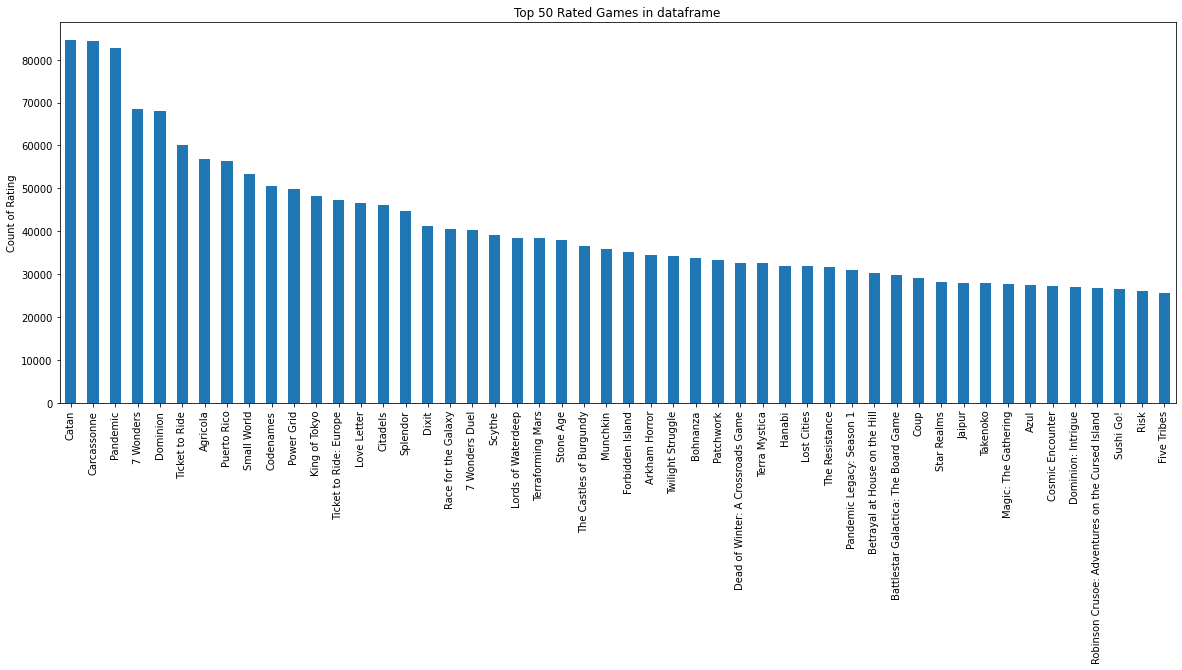

In [8]:
# this chart represents top 50 rated words from dataframe 
plt.figure(figsize=(20, 7))
review_data_game['name'].value_counts()[:50].plot(kind='bar')
plt.ylabel('Count of Rating')
plt.title('Top 50 Rated Games in dataframe')
plt.show()

In [9]:
review_data_game = review_data_game[['comment','rating']]
#removing missing values from dataframe
review_data_game.dropna(inplace=True)
print("Length of dataset after removing missing values: ",len(review_data_game))
print('')
review_data_game.head()

Length of dataset after removing missing values:  2637756



,comment,rating
2,"Currently, this sits on my list as my favorite...",10.0
3,"I know it says how many plays, but many, many ...",10.0
7,i will never tire of this game.. Awesome,10.0
11,This is probably the best game I ever played. ...,10.0
16,Fantastic game. Got me hooked on games all ove...,10.0


In [10]:
#tokenization of comments column and removing punctuation
from nltk.tokenize import RegexpTokenizer
#this regular expression tokenize words in comma separated form
tokenizer = RegexpTokenizer(r'\w+')
review_data_game['comment'] = review_data_game['comment'].apply(lambda x: tokenizer.tokenize(x.lower()))
review_data_game.head()

,comment,rating
2,"[currently, this, sits, on, my, list, as, my, ...",10.0
3,"[i, know, it, says, how, many, plays, but, man...",10.0
7,"[i, will, never, tire, of, this, game, awesome]",10.0
11,"[this, is, probably, the, best, game, i, ever,...",10.0
16,"[fantastic, game, got, me, hooked, on, games, ...",10.0


In [11]:
#removing stop words from comments 
stops = set(stopwords.words("english"))
review_data_game['comment'] = review_data_game['comment'].apply(lambda x: [item for item in x if item not in stops])
review_data_game.head(10)

,comment,rating
2,"[currently, sits, list, favorite, game]",10.0
3,"[know, says, many, plays, many, many, uncounte...",10.0
7,"[never, tire, game, awesome]",10.0
11,"[probably, best, game, ever, played, requires,...",10.0
16,"[fantastic, game, got, hooked, games]",10.0
17,"[one, best, games, ever, created, period, new,...",10.0
19,"[game, 9, strategy, game, family, asks, play, ...",10.0
20,"[great, game, even, got, number, non, game, pl...",10.0
21,"[one, time, favorite, games, usually, get, pla...",10.0
25,"[settlers, gem, havn, played, suggest, go, get...",10.0


In [0]:
#joining all tokens to proceed further for data modeling
review_data_game['comment'] = review_data_game['comment'].apply(' '.join)

In [13]:
review_data_game.head()

,comment,rating
2,currently sits list favorite game,10.0
3,know says many plays many many uncounted liked...,10.0
7,never tire game awesome,10.0
11,probably best game ever played requires thinki...,10.0
16,fantastic game got hooked games,10.0


>Data visualization

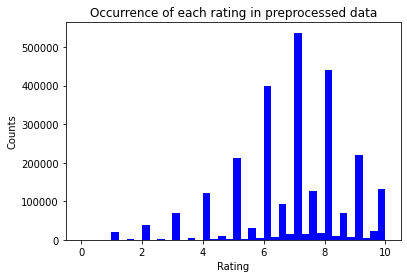

In [14]:
#histogram representing how much time each ratings occur
fig = plt.figure()
n, bins, patches = plt.hist(review_data_game.rating, bins=40, facecolor='blue',alpha = 1)
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('Occurrence of each rating in preprocessed data')
fig.patch.set_facecolor('white')
plt.show()
# width of bars are defined using value of bin

* As we can see, most of the ratings are between 6 and 8.
* Below functions explains exact values.


In [15]:
#average value of all the ratings 
print("Average rating: ",review_data_game['rating'].mean())
#median value of ratings values
print("Median value: ",review_data_game['rating'].median())

Average rating:  6.852069823043514
Median value:  7.0


Model Creation and testing 
---

In [0]:
#selecting chunk of data (if you want) from whole dataframe for further model training and testing
review_data = review_data_game

In [0]:
#rounding up all values of rating column such that: 7.8 ~ 8.0
review_data['rating'] =np.round(review_data['rating'])

In [18]:
#occurance of each rating in the column
review_data['rating'].value_counts()

8.0     657581
7.0     574586
6.0     526481
9.0     239410
5.0     217766
10.0    153530
4.0     136565
3.0      70974
2.0      40766
1.0      20086
0.0         11
Name: rating, dtype: int64

In [0]:
#splitting dataset in to four parts randomly
X_train, X_test, y_train, y_test = train_test_split(review_data['comment'], review_data['rating'], test_size=0.3) # 70% training and 30% test

>TF-IDF stands for term frequency-inverse document frequency.TF-IDF is a weight often used in information retrieval and text mining.Tf-idf can be successfully used for stop-words filtering in various subject fields including text summarization and classification.<br>
CountVectorizer:<br>
Transforms text into a sparse matrix of n-gram counts.<br>
TfidfTransformer:<br>
Performs the TF-IDF transformation from a provided matrix of counts.

In [0]:
#vectorizing our data
#Convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer()
transformer = TfidfTransformer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

X_train_counts = transformer.fit_transform(X_train)
X_test_counts = transformer.fit_transform(X_test)



> Multinomial NaiveBayes



In [21]:
model_mNB = MultinomialNB().fit(X_train_counts, y_train.astype('int'))
y_predicted_mNB = model_mNB.predict(X_test_counts)

accuracy = accuracy_score(y_test.astype('int'),y_predicted_mNB) * float(100)
accuracy_mNB = str(accuracy)
print('Testing Accuracy on multinomial naive bayes model is: '+accuracy_mNB+' %')

Testing Accuracy on multinomial naive bayes model is: 30.23579379952914 %


Confusion matrix for Multinomial Naive Bayes classifier:



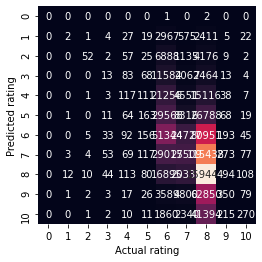

In [22]:
#confusion matrix for what output we got
print("Confusion matrix for Multinomial Naive Bayes classifier:\n")
matrix = confusion_matrix(y_test.astype('int'), y_predicted_mNB)
sb.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False )
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating');
plt.show()

>Ridge Classifier<br>


In [24]:
model_ridge_class = RidgeClassifier().fit(X_train_counts, y_train.astype('int'))
y_predicted = model_ridge_class.predict(X_test_counts)
y_predicted_ridge_class = np.round(y_predicted)
accuracy = accuracy_score(y_test,y_predicted_ridge_class) * float(100)
ridge_class_accuracy = str(accuracy)
print('Testing Accuracy on ridge classifier model is: '+ridge_class_accuracy+' %')

Testing Accuracy on ridge classifier model is: 31.376914979521743 %


Confusion matrix for Ridge Classifier:



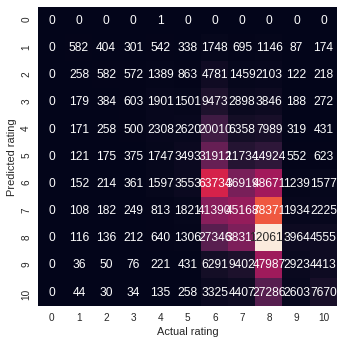

In [109]:
print("Confusion matrix for Ridge Classifier:\n")
matrix = confusion_matrix(y_test.astype('int'), y_predicted_ridge_class)
sb.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False )
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating');
plt.show()

In [129]:
#here you can test rating for your desired review
smt = "worst game dont play always play"
smt=[smt]
smt = vectorizer.transform(smt)
smt = transformer.fit_transform(smt)
prediction = np.round(model_ridge_class.predict(smt))
print(prediction)

[1]


>Classification report for the above two classifiers<br>

This report contains values like, precision, recall, support and f1 score.These values help us to determine what is the error for testing data.

In [164]:
#computing f1 score to find weighted average of precision and recall
#f1 score is always defined in range of [0,1]
#where 0 is worse case and 1 is considered as best case
#recall is ratio of True positive over sum of true positive and false negative
#precision is ratio of True positive over sum of true positive and false positive
#support is total number of instances in the set 
labels = ['0.0','1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0']
p = classification_report(y_test.astype('int'), y_predicted_mNB, target_names=labels,zero_division=1)
print("Representation of classification matrix on a per-class basis:\n")
print("Report for multinomial naive bayes:\n ")
print(p)
print('')
p = classification_report(y_test.astype('int'), y_predicted_ridge_class, target_names=labels,zero_division=1,)
print("Report for Ridge regression:\n ")
print(p)

Representation of classification matrix on a per-class basis:

Report for multinomial naive bayes:
 
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00         1
         1.0       0.18      0.00      0.00      6017
         2.0       0.60      0.00      0.01     12347
         3.0       0.08      0.00      0.00     21245
         4.0       0.20      0.00      0.01     40964
         5.0       0.23      0.00      0.00     65656
         6.0       0.29      0.32      0.31    158017
         7.0       0.28      0.16      0.20    172261
         8.0       0.31      0.81      0.45    197197
         9.0       0.23      0.00      0.01     71830
        10.0       0.45      0.01      0.01     45792

    accuracy                           0.30    791327
   macro avg       0.35      0.12      0.09    791327
weighted avg       0.29      0.30      0.22    791327


Report for Ridge regression:
 
              precision    recall  f1-score   support


Some other models
---

I have trained these models for some small number of dataset values (20000-30000). Just to check their performance, accuracy, and time consumption

In [0]:
small_review_data = review_data_game.sample(n=30000)
small_review_data['rating'] =np.round(small_review_data['rating'])
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(small_review_data['comment'], small_review_data['rating'], test_size=0.3) # 70% training and 30% test

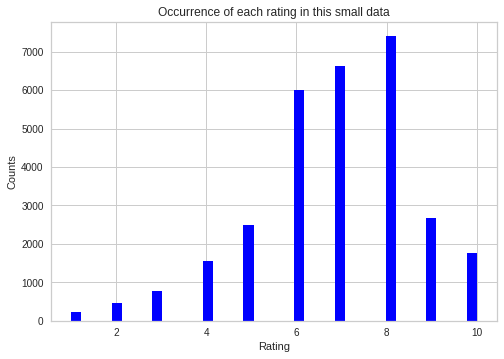

In [121]:
#histogram representing how much time each ratings occur
fig = plt.figure()
n, bins, patches = plt.hist(small_review_data.rating, bins=40, facecolor='blue',alpha = 1)
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('Occurrence of each rating in this small data')
fig.patch.set_facecolor('white')
plt.show()
# width of bars are defined using value of bin

In [0]:
#vectorizing our data
vect = TfidfVectorizer()
trans = TfidfTransformer()

X_train_small = vect.fit_transform(X_train_small)
X_test_small = vect.transform(X_test_small)

X_train_small = trans.fit_transform(X_train_small)
X_test_small = trans.fit_transform(X_test_small)
#model_SVM = Pipeline([
#    ('Tfidf_vectorizer', TfidfVectorizer()), 
#    ('Tfidf_transformer',  TfidfTransformer()), 
#    ('classifier', SVC(kernel="linear"))])  #this kernel=linear argument states that decision boundary to separate data is straight line



> Support vector machine (SVC)



In [138]:
model_SVC = SVC(kernel="linear",probability=True).fit(X_train_small,y_train_small.astype('int'))
#this kernel=linear argument states that decision boundary to separate data is straight line
y_predicted_SVC = model_SVC.predict(X_test_small)
accuracy = accuracy_score(y_test_small.astype('int'),y_predicted_SVC) * float(100)
accuracy_svc = str(accuracy)
print('Testing Accuracy is: '+accuracy_svc+' %')

Testing Accuracy is: 28.999999999999996 %


Confusion matrix for Support vector machine:



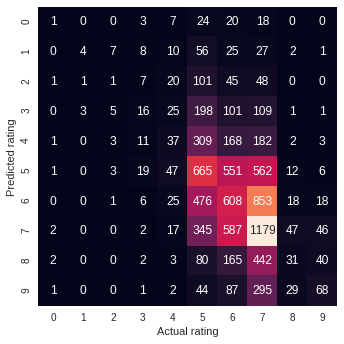

In [113]:
print("Confusion matrix for Support vector machine:\n")
matrix = confusion_matrix(y_test_small.astype('int'), y_predicted_SVC)
sb.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False )
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating');
plt.show()



> Support vector machine (Linear SVC)
* We will use same number of samples in SVC and Linear SVC for accuracy comparison


In [139]:
model_linear_SVC = LinearSVC().fit(X_train_small,y_train_small.astype('int'))
y_predicted_linear_SVC = model_linear_SVC.predict(X_test_small)
accuracy = accuracy_score(y_test_small.astype('int'),y_predicted_linear_SVC) * float(100)
accuracy_linear_svc = str(accuracy)
print('Testing Accuracy is: '+accuracy_linear_svc+' %')

Testing Accuracy is: 26.066666666666666 %


Confusion matrix for Linear Support vector machine:



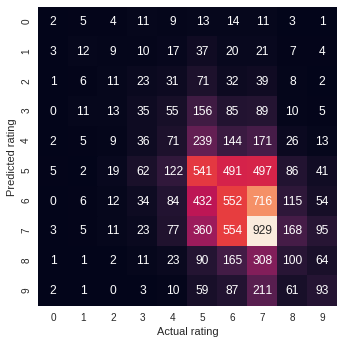

In [114]:
print("Confusion matrix for Linear Support vector machine:\n")
matrix = confusion_matrix(y_test_small.astype('int'), y_predicted_linear_SVC)
sb.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False )
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating');
plt.show()

* For same number of training and testing data, SVC model gives better accuracy than Linear SVC model, but at cost of time.



> Logistic Regression




In [72]:
model_Logistic_Regression = LogisticRegression(max_iter=20000).fit(X_train_small,y_train_small.astype('int'))
y_predicted_log_reg = model_Logistic_Regression.predict(X_test_small)
accuracy = accuracy_score(y_test_small.astype('int'),y_predicted_log_reg) * float(100)
accuracy_log_reg = str(accuracy)
print('Testing Accuracy is: '+accuracy_log_reg+' %')

Testing Accuracy is: 29.22222222222222 %


* Logistic regression gives almost same accuracy as SVC model in even lesser time

Confusion matrix for Logistic regression:



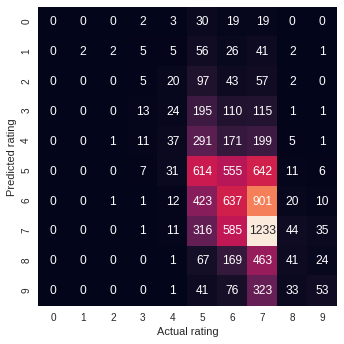

In [115]:
print("Confusion matrix for Logistic regression:\n")
matrix = confusion_matrix(y_test_small.astype('int'), y_predicted_log_reg)
sb.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False )
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating');
plt.show()

>K nearest neighbours

In [73]:
model_kNN = KNeighborsClassifier(n_neighbors=10).fit(X_train_small,y_train_small.astype('int'))
y_predicted_knn = model_kNN.predict(X_test_small)
accuracy = accuracy_score(y_test_small.astype('int'),y_predicted_knn) * float(100)
accuracy_knn = str(accuracy)
print('Testing Accuracy is: '+accuracy_knn+' %')

Testing Accuracy is: 22.566666666666666 %


Confusion matrix for kNN:



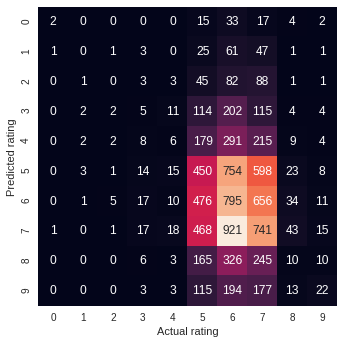

In [116]:
print("Confusion matrix for kNN:\n")
matrix = confusion_matrix(y_test_small.astype('int'), y_predicted_knn)
sb.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False )
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating');
plt.show()

#Ensemble methods



Ensemple method is machine learning trechnique which improves accuracy of algorithm by combining two or more individual algorithms for same dataset.<br>
On above part, I got accuracy for SVC, Linear SVC, logistic regression, but that is very low to classify some random text.<br>
SO here, I am using ensemble method on those algorithms to get better accuracy than what I have got.<br>
Below is the **architecture** of working of ensemble methods.

In [140]:
from sklearn.ensemble import VotingClassifier
Ensemble = VotingClassifier(estimators=[('Linear SVC',model_SVC),('knn',model_kNN),('logistic',model_Logistic_Regression)],voting='soft',weights=[2,1,3])
model_ensemble = Ensemble.fit(X_train_small,y_train_small.astype('int'))
ensemble_predicted = model_ensemble.predict(X_test_small)
accuracy_ensemble = accuracy_score(ensemble_predicted,y_test_small.astype('int'))* float(100)
accuracy_ensemble = str(accuracy_ensemble)
print('Testing Accuracy is: '+accuracy_ensemble+' %')

Testing Accuracy is: 28.844444444444445 %


* As we can see, after ensembling Logistic regression, kNN and SVC algorithms we got better accuracy than what they have individually achieved.  

Confusion matrix for Ensemble methos for given estimators:



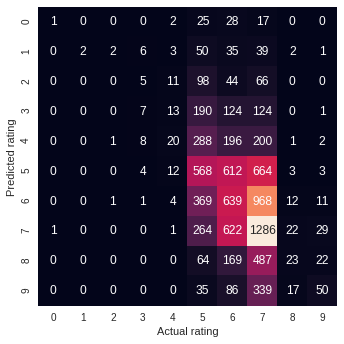

In [141]:
print("Confusion matrix for Ensemble methos for given estimators:\n")
matrix = confusion_matrix(y_test_small.astype('int'), ensemble_predicted)
sb.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False )
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating');
plt.show()

#Final Test

Here i have visualized accuracy of all the classifiers to compare.

In [0]:
acc=[]
acc.append(accuracy_mNB)
acc.append(ridge_class_accuracy)
acc.append(accuracy_svc)
acc.append(accuracy_linear_svc)
acc.append(accuracy_log_reg)
acc.append(accuracy_knn)

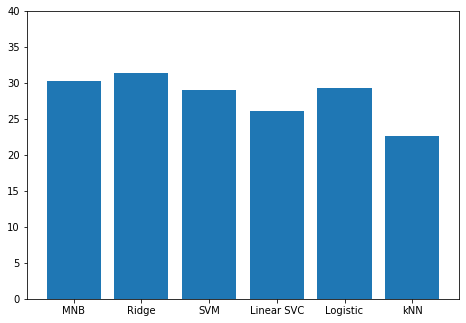

In [42]:
fig = plt.figure()
labels = ['MNB','Ridge','SVM','Linear SVC','Logistic','kNN']
#acc = [accuracy_mNB,ridge_class_accuracy,accuracy_svc,accuracy_linear_svc,accuracy_log_reg,accuracy_knn]
#acc = [1,2,3,4,5,6]
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,acc)
plt.ylim(0,40,0.01)
plt.show()

>From above all classifiers and ensemble methods, Ridge classifier gives best output (prediction) for given review. So we are using that one for random review inputs.

#Contributions



1.   The reference that  i have used for support vector machine, it was done without using any hyperparameters. I have implemented it's probability and "linear" kernel and got improved accuracy. 
2.   Implemented Ensemble methods over some of selected classifiers. I achieved a good accuracy than those individuals are getting. I used voting classifier in ensemble methods, with appropriate weighted voting to three classifiers. As I have used less data for those classifiers, accuracy is less. But for larger data surely would get better results. 
3. Saved model in local system for further any classification purpose. 



#Challenges faced:



1.   The dataset was too large for the systems we are using, so I need to pre process data first in order to use it for training and testing. For pre processing I have to use case lowering, tokenization, regular expression for alphabets, punctuation removal and removing stop words.
2.   I am using 5-7 classifiers for accuracy comparisons and data analysis. So I have to got in depth knowledge about those classifiers before implementation.
3. Better data visualization, I need to understand 7-10 types of libraries and graphs.



#Exporting trained models to drive and then to local system for further use

In [79]:
#using joblib from sklearn to export the trained model, vectorizer, transformer objects to local files
#so that we can use them further anywhere else without running whole model again and get the accuracy
#as i am working on colab these values will be stored in google drive itself from which we can retrive later  
os.chdir('/content/gdrive/My Drive/Colab Notebooks')
from sklearn.externals import joblib
joblib.dump(model_ridge_class,'model_ridge_class.sav')
joblib.dump(model_mNB,'model_mNB.sav')
joblib.dump(model_SVC,'model_SVC.sav')
joblib.dump(model_linear_SVC,'model_linear_svc.sav')
joblib.dump(model_Logistic_Regression,'model_logistic_regression.sav')
joblib.dump(model_kNN,'model_knn.sav')
joblib.dump(model_ensemble,'model_ensemble.sav')
joblib.dump(vectorizer,'vectorizer.sav')
joblib.dump(transformer,'transformer.sav')

['transformer.sav']

#References:



1.   Reading large dataset: https://towardsdatascience.com/3-simple-ways-to-handle-large-data-with-pandas-d9164a3c02c1
2.   Data Preparation: https://www.kaggle.com/ngrq94/boardgamegeek-reviews-data-preparation
3.   Data preprocessing: https://pythonhealthcare.org/2018/12/14/101-pre-processing-data-tokenization-stemming-and-removal-of-stop-words/<br>
https://towardsdatascience.com/nlp-for-beginners-cleaning-preprocessing-text-data-ae8e306bef0f 
4. Multinomial Naive Bayes: https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
5. Working with text data: https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
6. Multi-Class Text Classification with Scikit-Learn: https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
7. Vectorizing using Scikit-learn API's : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text
8. Ridge Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html
9. Linear SVC classifier: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
10. SVC classifier: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
11. Logistic regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
12. Ensemble methods: https://scikit-learn.org/stable/modules/ensemble.html
13. Confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
14. Classification report: https://scikit-learn.org/0.18/modules/generated/sklearn.metrics.classification_report.html
15. Random histograms: https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a